In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [113]:
# Load the train and test dataset
app_train = pd.read_csv("../input/home-credit-default-risk/application_train.csv")
app_test = pd.read_csv("../input/home-credit-default-risk/application_test.csv")

In [114]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [115]:
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

# 1. Structure Investigation

1.1 Structure Investigation for training set

In [116]:
# Split app_train into training features and trainign labels
train_labels = app_train["TARGET"]

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

In [117]:
app_train.shape

(307511, 121)

This training set has 307511 samples and 121 features

In [118]:
pd.value_counts(app_train.dtypes)

float64    65
int64      40
object     16
dtype: int64

In [119]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 283.9+ MB


In [120]:
app_train.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean   278180.518577       0.417052      1.687979e+05  5.990260e+05   
std    102790.175348       0.722121      2.371231e+05  4.024908e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189145.500000       0.000000      1.125000e+05  2.700000e+05   
50%    278202.000000       0.000000      1.471500e+05  5.135310e+05   
75%    367142.500000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  307511.000000  307511.000000      307511.000000  ...     307511.000000   
mean   -16036.995067   63815.045904       -4986.120328  ...          0.008130   
std      4363.988632  141275.766519        3522.886321  ...          0.089798   
min    -25229.000000  -17912.000000      -24672.000000  ...          0.000000   
25%    -19682.000000   -2760.000000       -7479.500000  ...          0.000000   
50%    -15750.000000   -1213.000000       -4504.000000  ...          0.000000   
75%    -12413.000000    -289.000000       -2010.000000  ...          0.000000   
max     -7489.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000   
mean           0.000595          0.000507          0.000335   
std            0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000            

1.2. Structure Investigation for test set

In [121]:
app_test.shape

(48744, 121)

In [122]:
pd.value_counts(app_test.dtypes)

float64    65
int64      40
object     16
dtype: int64

**1.3 Structure of non-numerical features**

In [123]:
# Display non-numerical features
app_train.select_dtypes(exclude= "number").head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0  Business Entity Type 3   reg oper account  block of flats   
1                  School   reg oper account  block of flats   
2              Government                NaN             NaN   
3  Business Entity Type 3                NaN             NaN   
4                Religion                NaN             NaN   

  WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       Stone, brick                  No  
1              Block                  No  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN

In [124]:
# investigate how many unique values each non-numerical feature has 
# and with which frequency the most prominent value is present.
app_train.describe(exclude="number")

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

**1.4 Structure of numerical features**

In [125]:
# Find number of unique values in each feature
unique_val = app_train.select_dtypes(include= "number").nunique().sort_values()

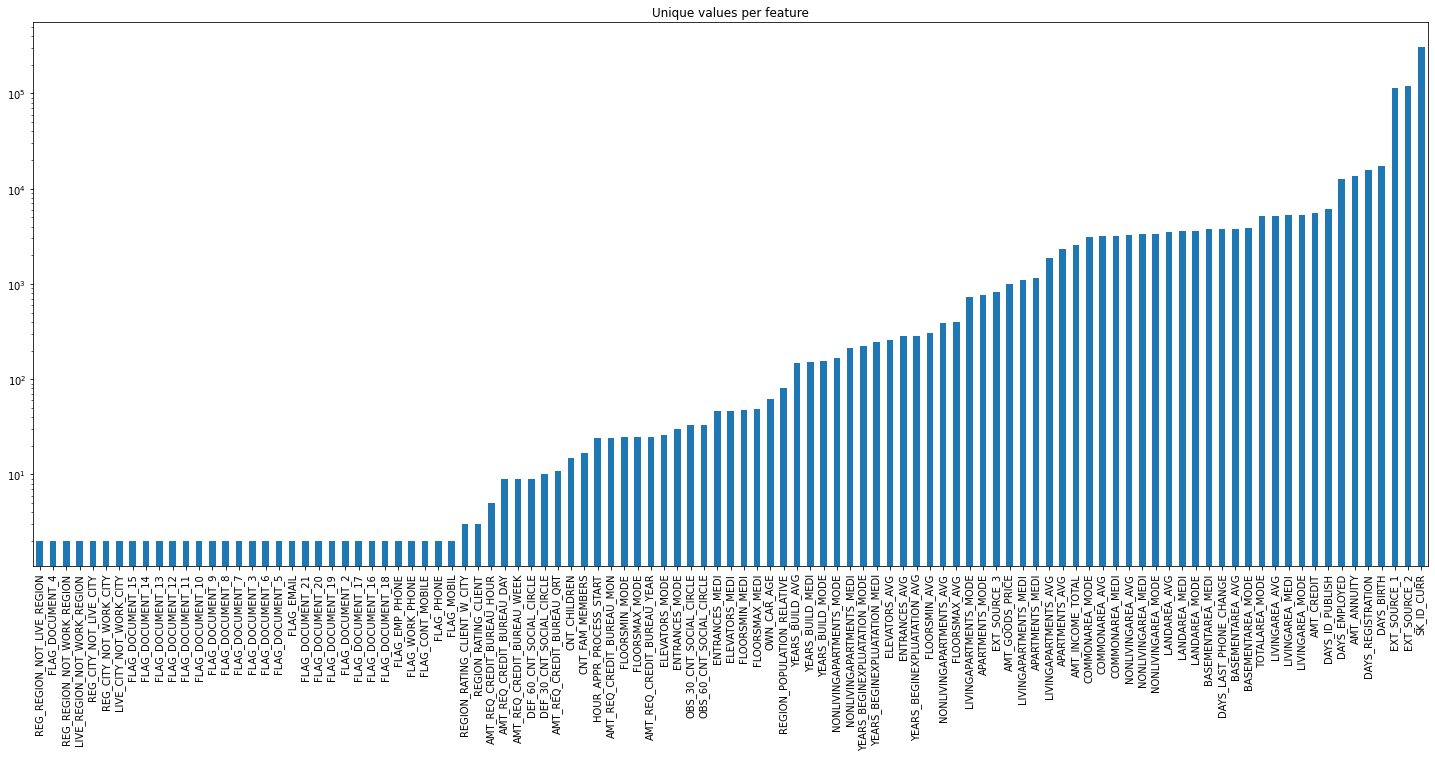

In [126]:
# Plot information with y-axis in log-scale
unique_val.plot.bar(logy=True, figsize=(25, 10), title="Unique values per feature");

# 2. Quality Investigation

**2.1. Duplicates**

In [127]:
# Check number of duplicates while ignoring the index feature
n_duplicates = app_train.drop(labels=["SK_ID_CURR"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


**2.2. Missing values**

Per Feature

In [128]:
nrows, ncols = app_train.shape

In [129]:
total_missing_val = app_train.isnull().sum().sort_values(ascending= False)
missing_val_percent = (100 * app_train.isnull().sum() / nrows).round(1).sort_values(ascending= False)
missing_val_data = pd.concat([total_missing_val, missing_val_percent], axis= 1, keys=['Total', 'Percent'])


In [130]:
missing_val_data = missing_val_data[missing_val_data.iloc[:, 1] != 0]
missing_val_data

Total  Percent
COMMONAREA_AVG            214865     69.9
COMMONAREA_MODE           214865     69.9
COMMONAREA_MEDI           214865     69.9
NONLIVINGAPARTMENTS_AVG   213514     69.4
NONLIVINGAPARTMENTS_MODE  213514     69.4
...                          ...      ...
OBS_60_CNT_SOCIAL_CIRCLE    1021      0.3
OBS_30_CNT_SOCIAL_CIRCLE    1021      0.3
DEF_60_CNT_SOCIAL_CIRCLE    1021      0.3
EXT_SOURCE_2                 660      0.2
AMT_GOODS_PRICE              278      0.1

[64 rows x 2 columns]

In [131]:
cols_with_missing_to_reduce = [col for col in missing_val_data.index 
                                 if missing_val_data.loc[col, "Percent"] > 60]
reduced_train_data = app_train.drop(cols_with_missing_to_reduce, axis=1).reset_index(drop=True)
reduced_test_data = app_test.drop(cols_with_missing_to_reduce, axis=1).reset_index(drop=True)

In [132]:
cols_with_missing_to_reduce

['COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE']

In [133]:
reduced_train_data.shape

(307511, 104)

**2.3 Unwanted entries and recording errors**

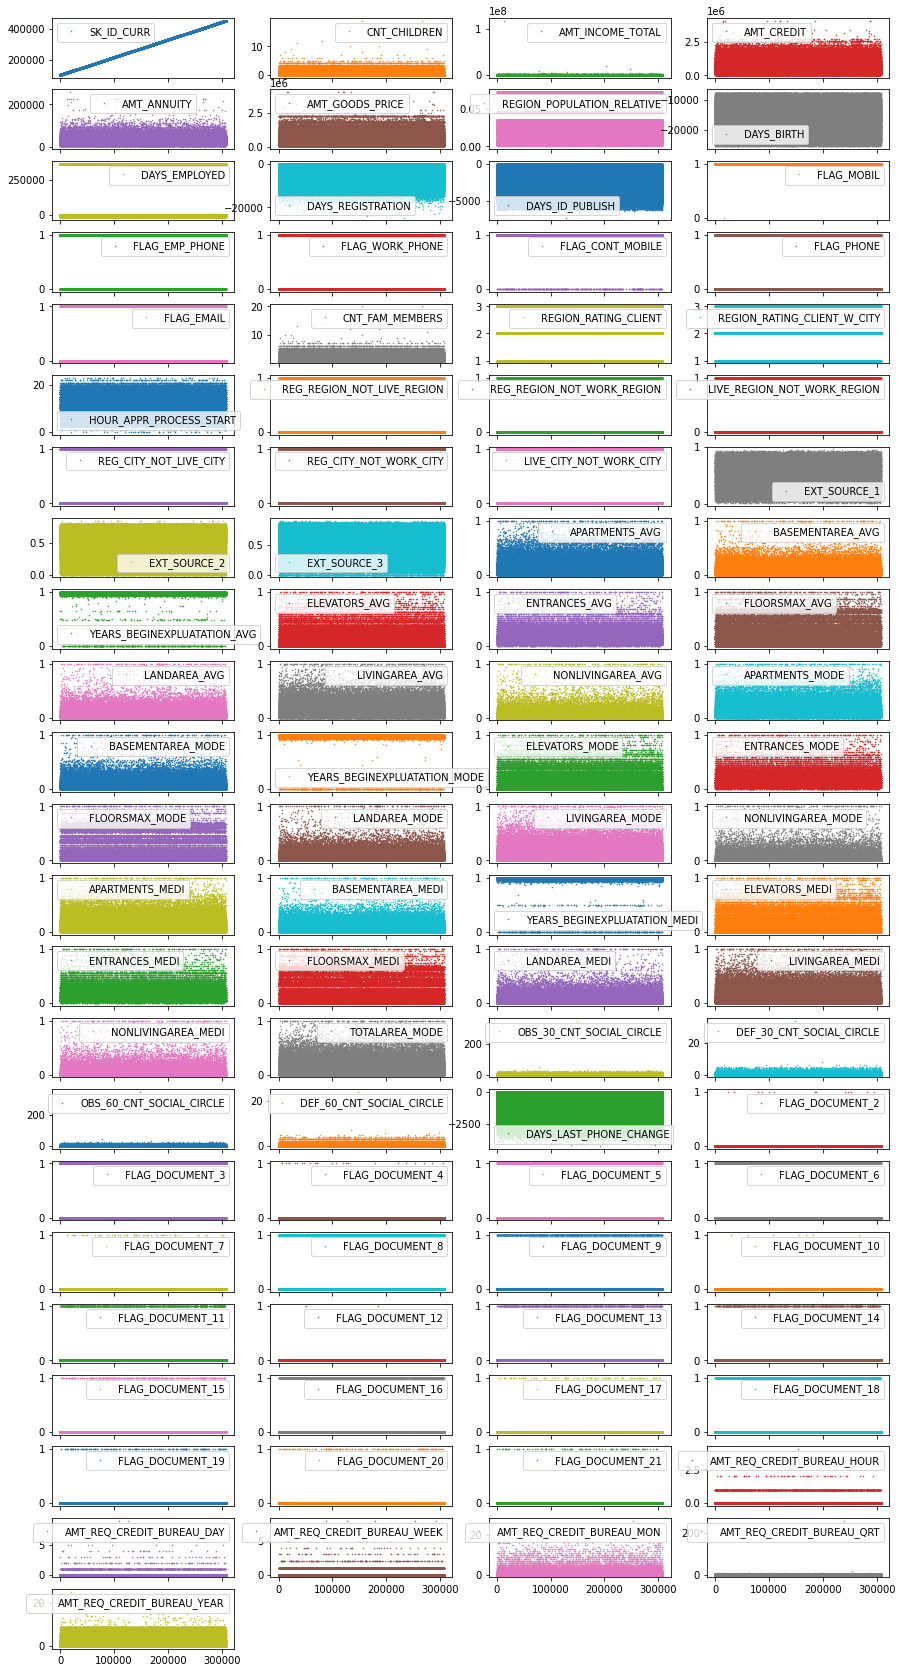

In [134]:
reduced_train_data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
                        figsize=(15, 30), markersize=1);

*2.3.2. Non-numerical features*

In [135]:
reduced_train_data.select_dtypes(exclude= "number").head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE  HOUSETYPE_MODE WALLSMATERIAL_MODE  \
0  Business Entity Type 3  block of flats       Stone, brick   
1                  School  block of flats              Block   
2              Government             NaN                NaN   
3  Business Entity Type 3             NaN                NaN   
4                Religion             NaN                NaN   

  EMERGENCYSTATE_MODE  
0                  No  
1                  No  
2                 NaN  
3                 NaN  
4                 NaN

In [136]:
len(reduced_train_data.select_dtypes(exclude= "number").head().columns)

15

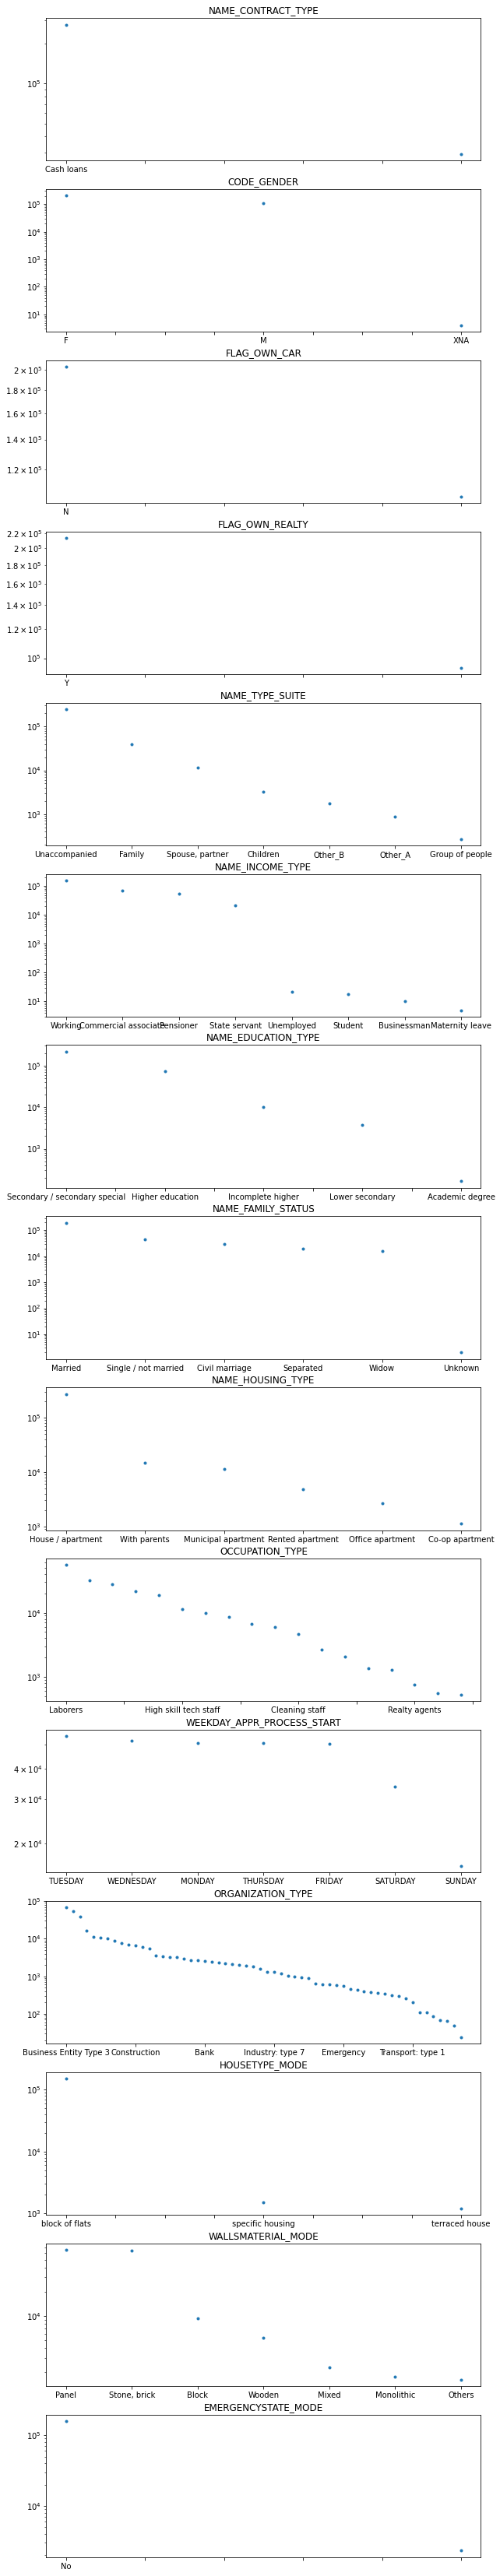

In [137]:
# Create figure object with 15 subplots
fig, axes = plt.subplots(ncols=1, nrows= 15, figsize=(10, 60))

# Identify non-numerical features
df_non_numerical = reduced_train_data.select_dtypes(exclude="number")

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(
        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)

# 3. Content Investigation

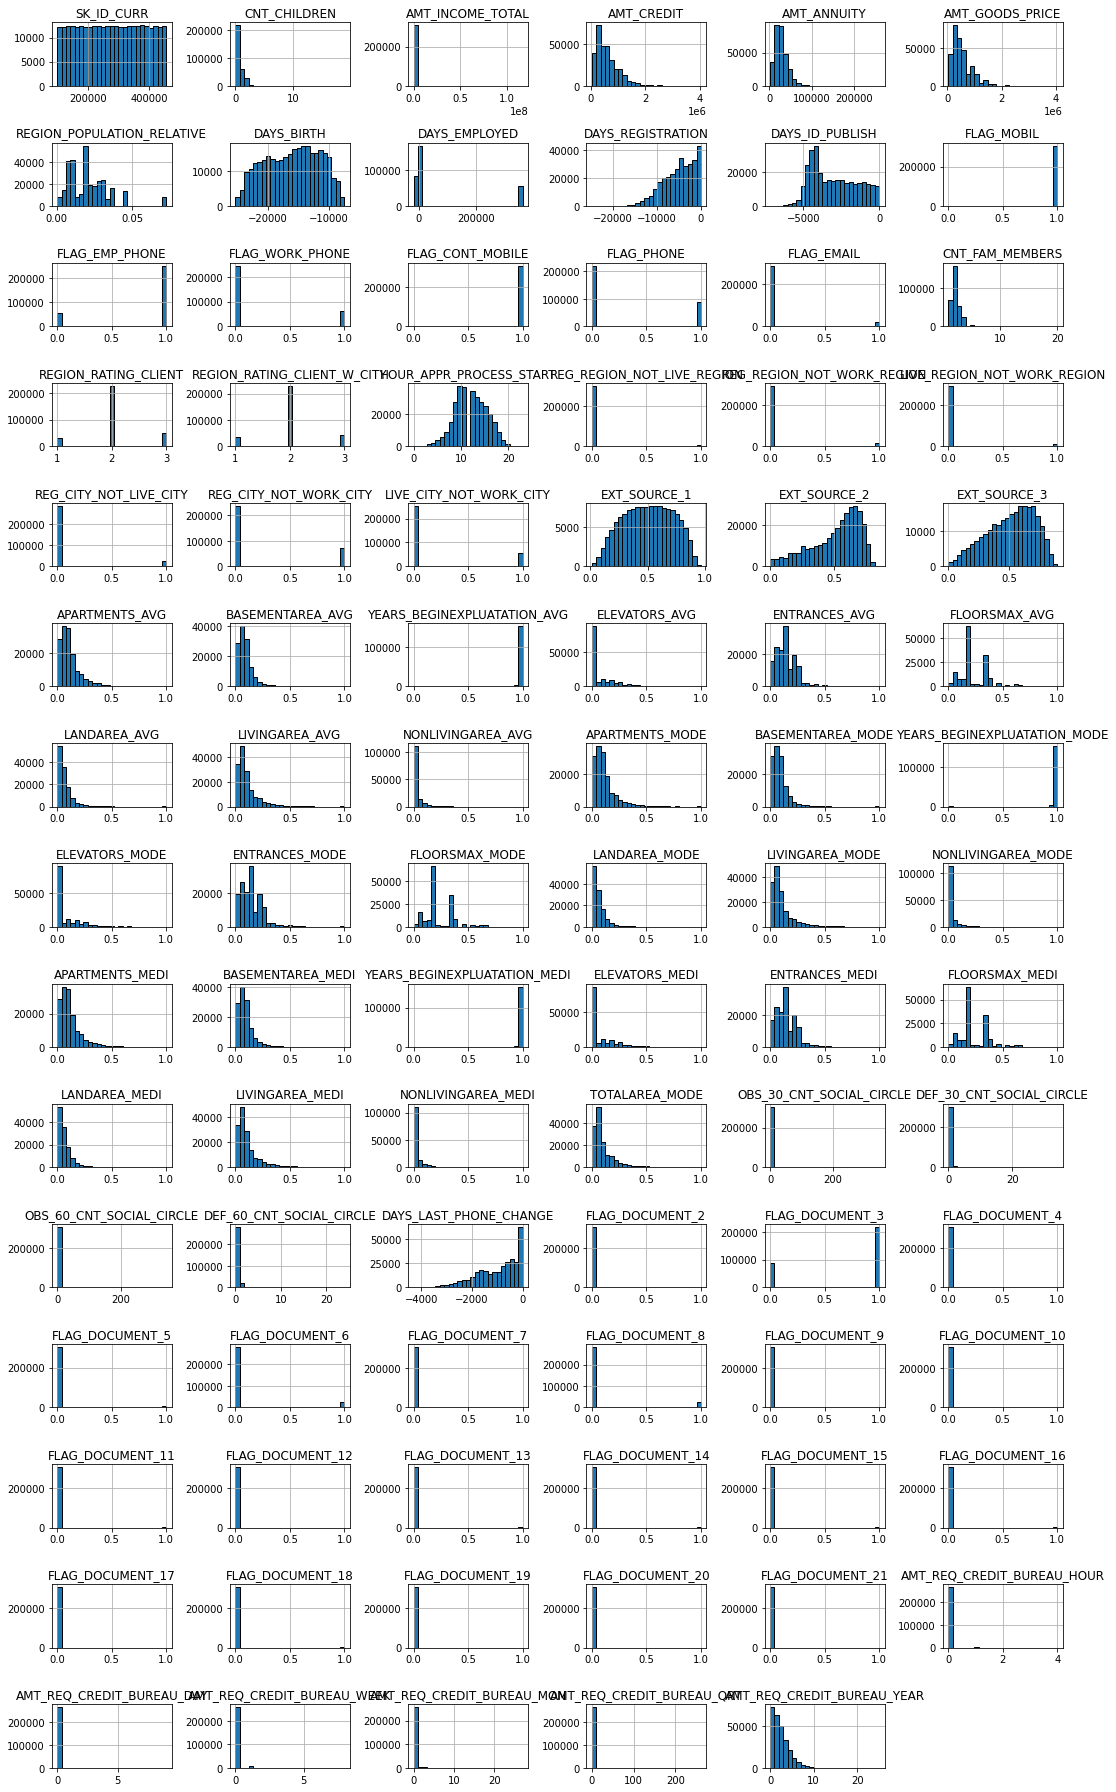

In [138]:
# Plots the histogram for each numerical feature in a separate subplot
reduced_train_data.hist(bins=25, figsize=(15, 25), layout=(-1, 6), edgecolor="black")
plt.tight_layout();

There are many features such as AMT_INCOME_TOTAL, FLAG_MOBILE, FLAG_CONT_MOBILE,... mostly contain entries of just one category

**3.2.1. Continuous features**

In [139]:
cols_continuous = reduced_train_data.select_dtypes(include="number").nunique() >= 25

In [140]:
# Create a new dataframe which only contains the continuous features
df_continuous = reduced_train_data[cols_continuous[cols_continuous].index]
df_continuous.shape

(307511, 45)

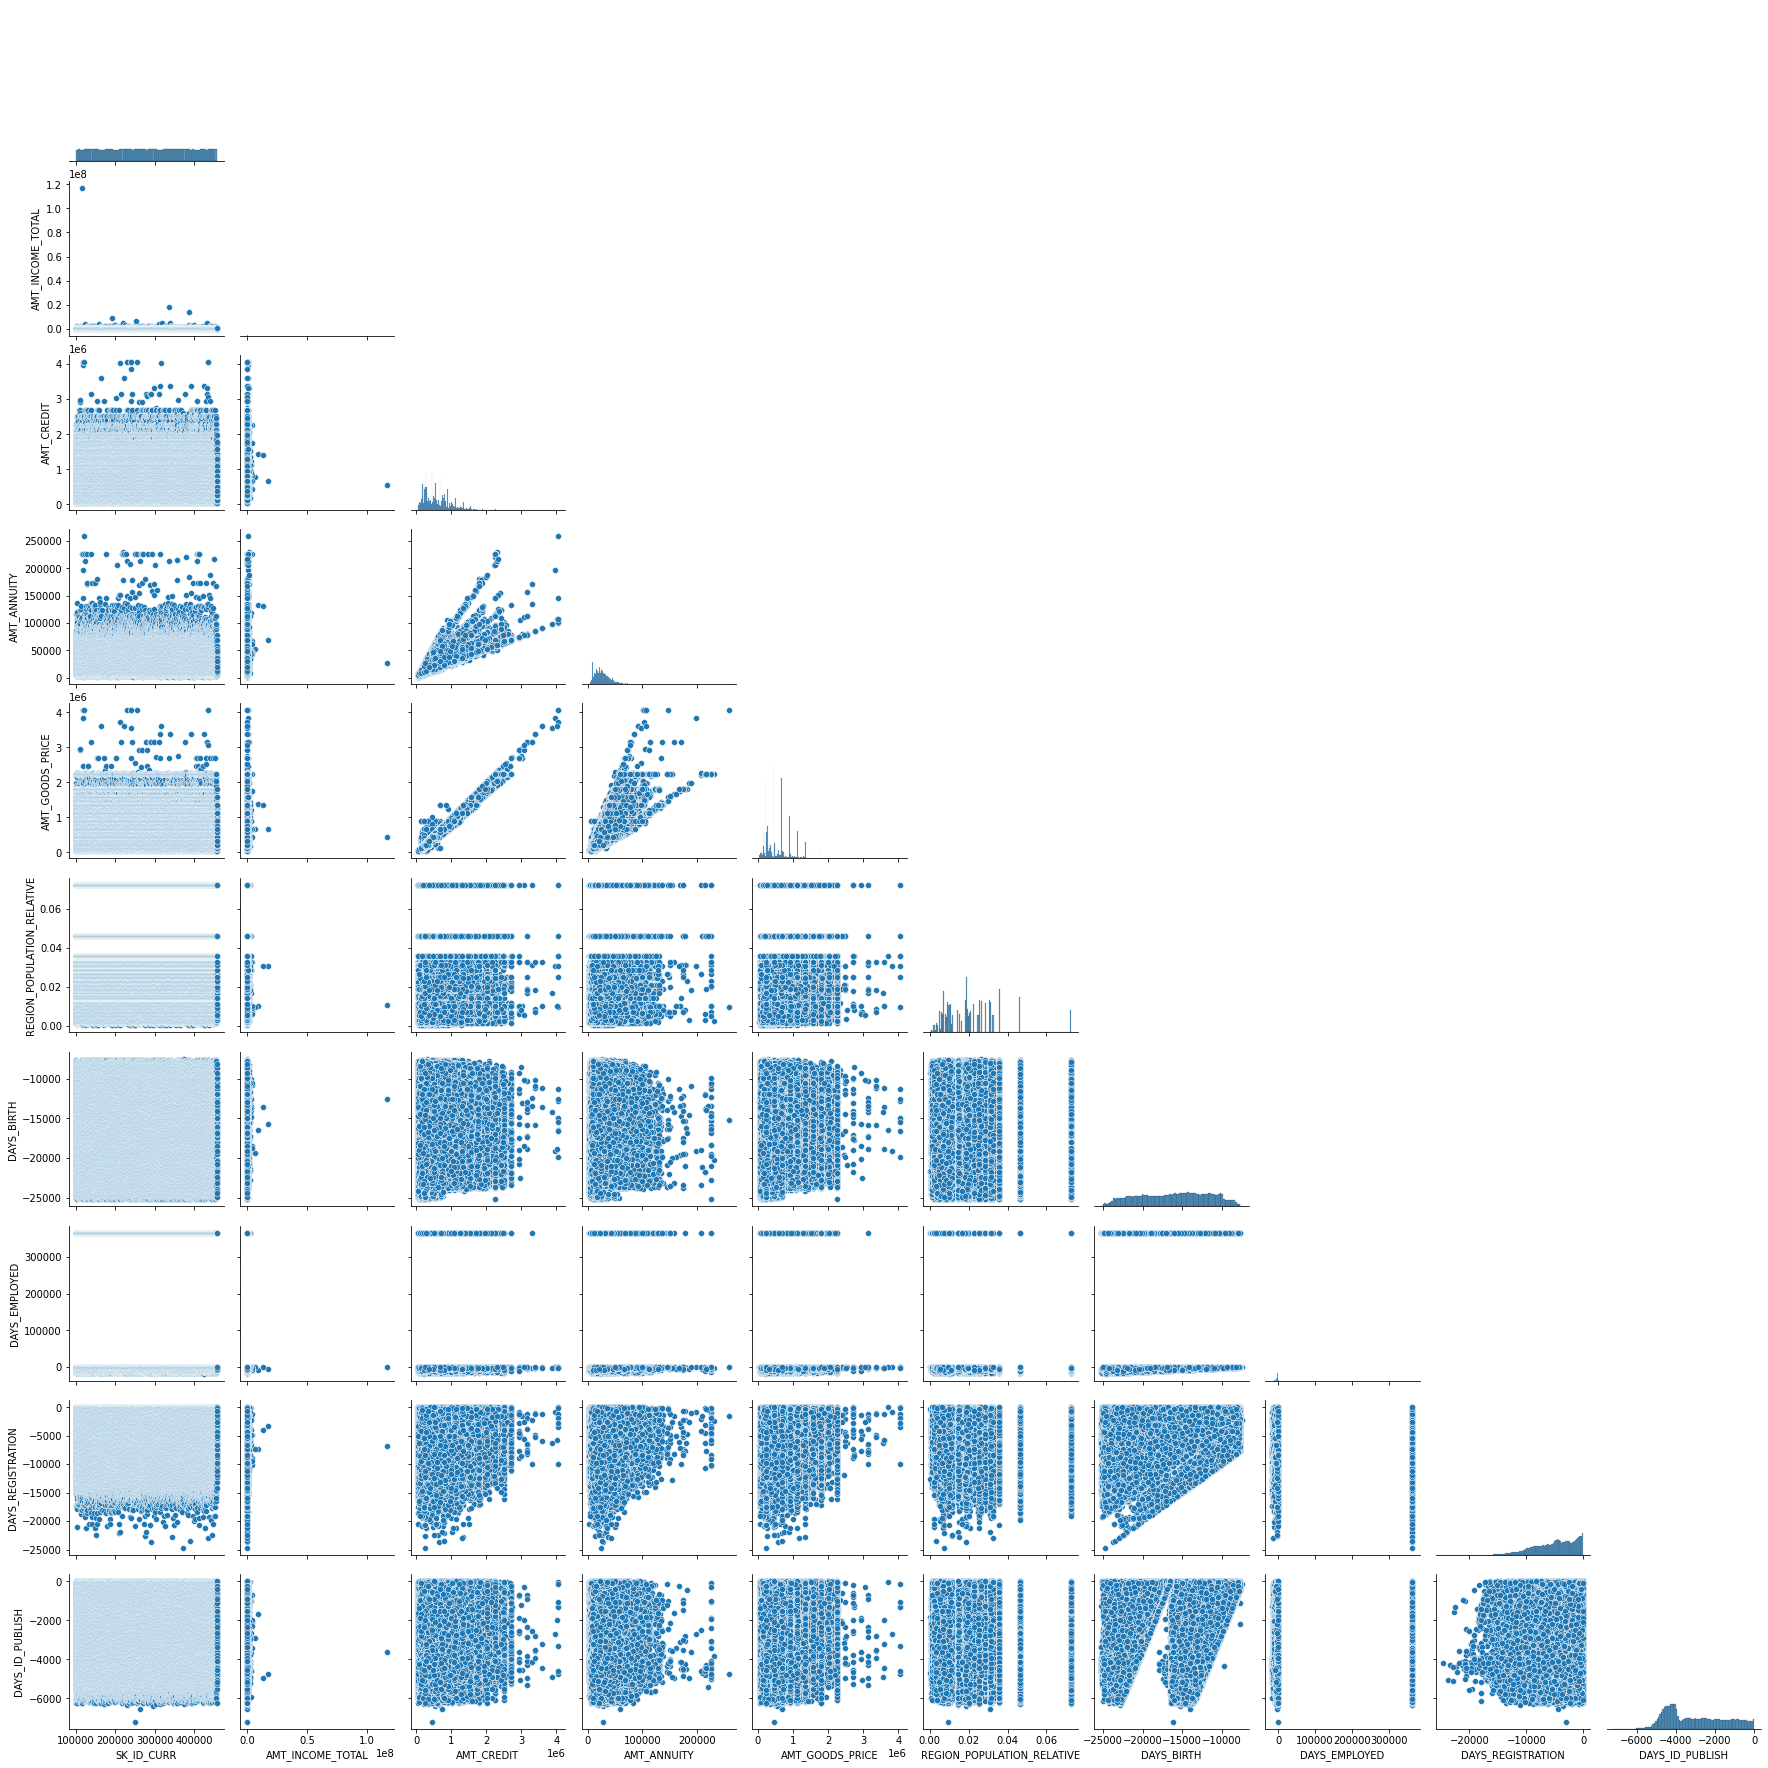

In [141]:
sns.pairplot(df_continuous.iloc[:, 0:10], corner=True)

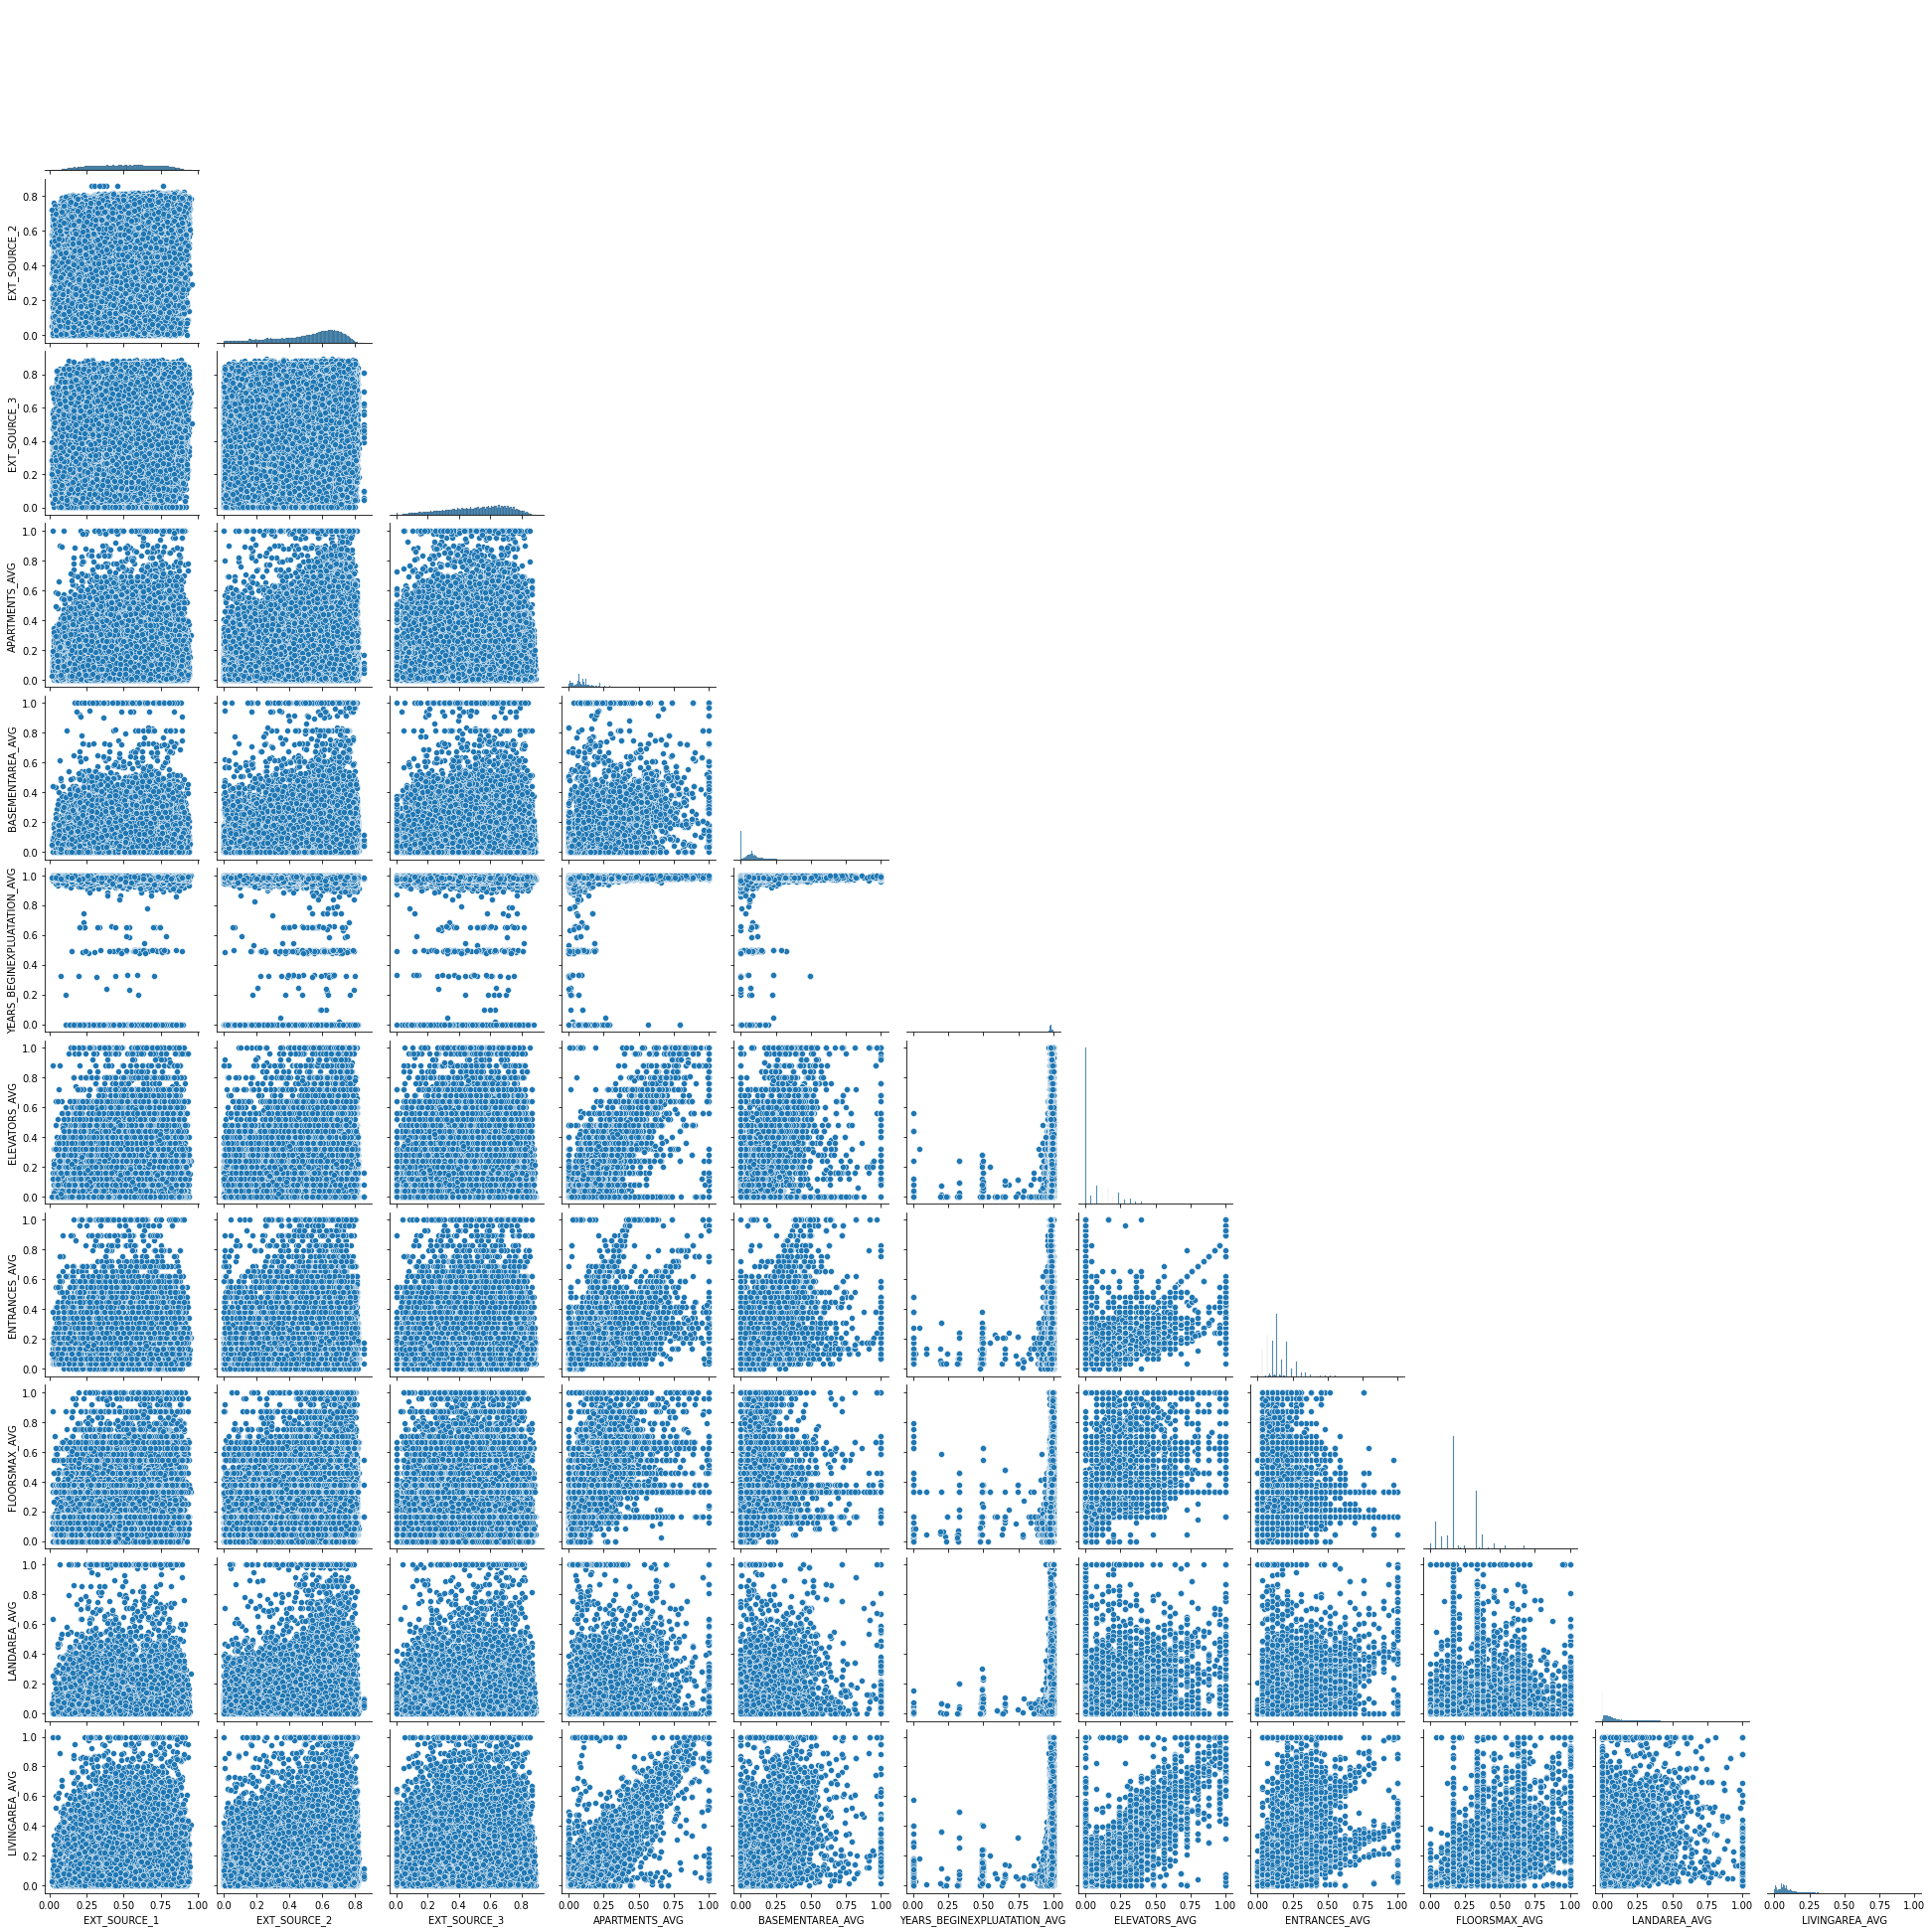

In [142]:
sns.pairplot(df_continuous.iloc[:, 10:21], corner=True)

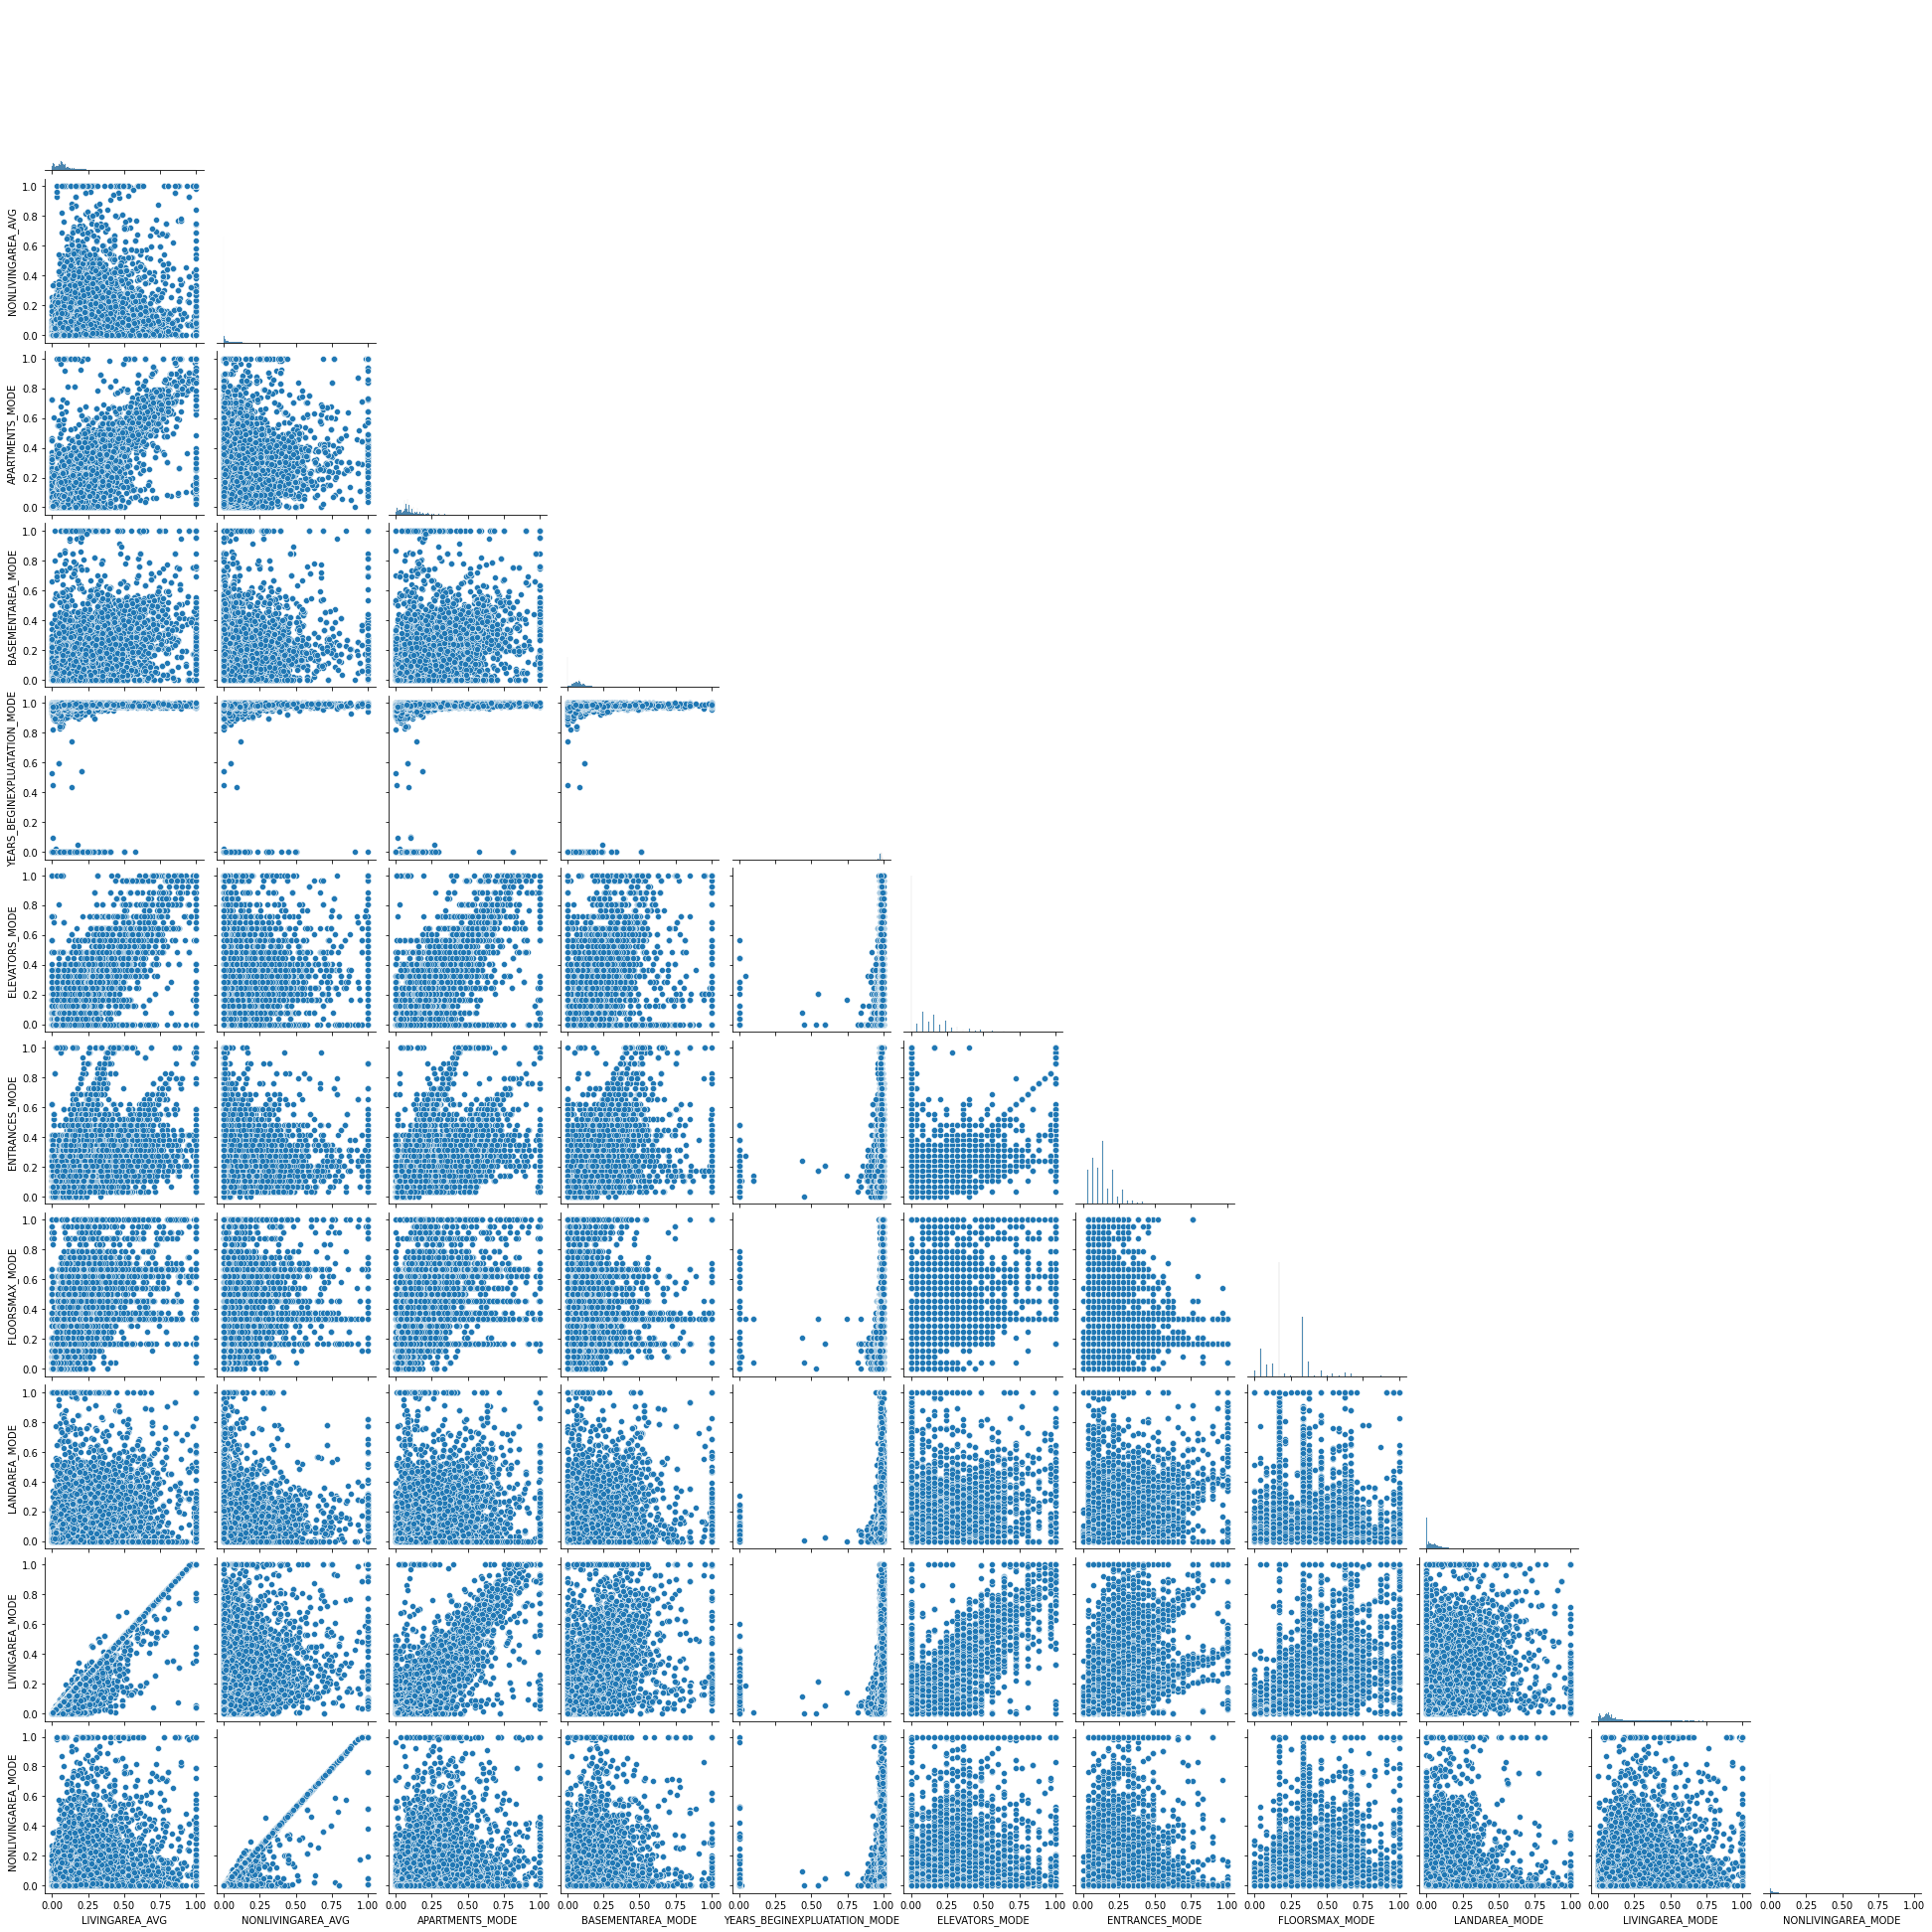

In [143]:
sns.pairplot(df_continuous.iloc[:, 20:31], corner=True)

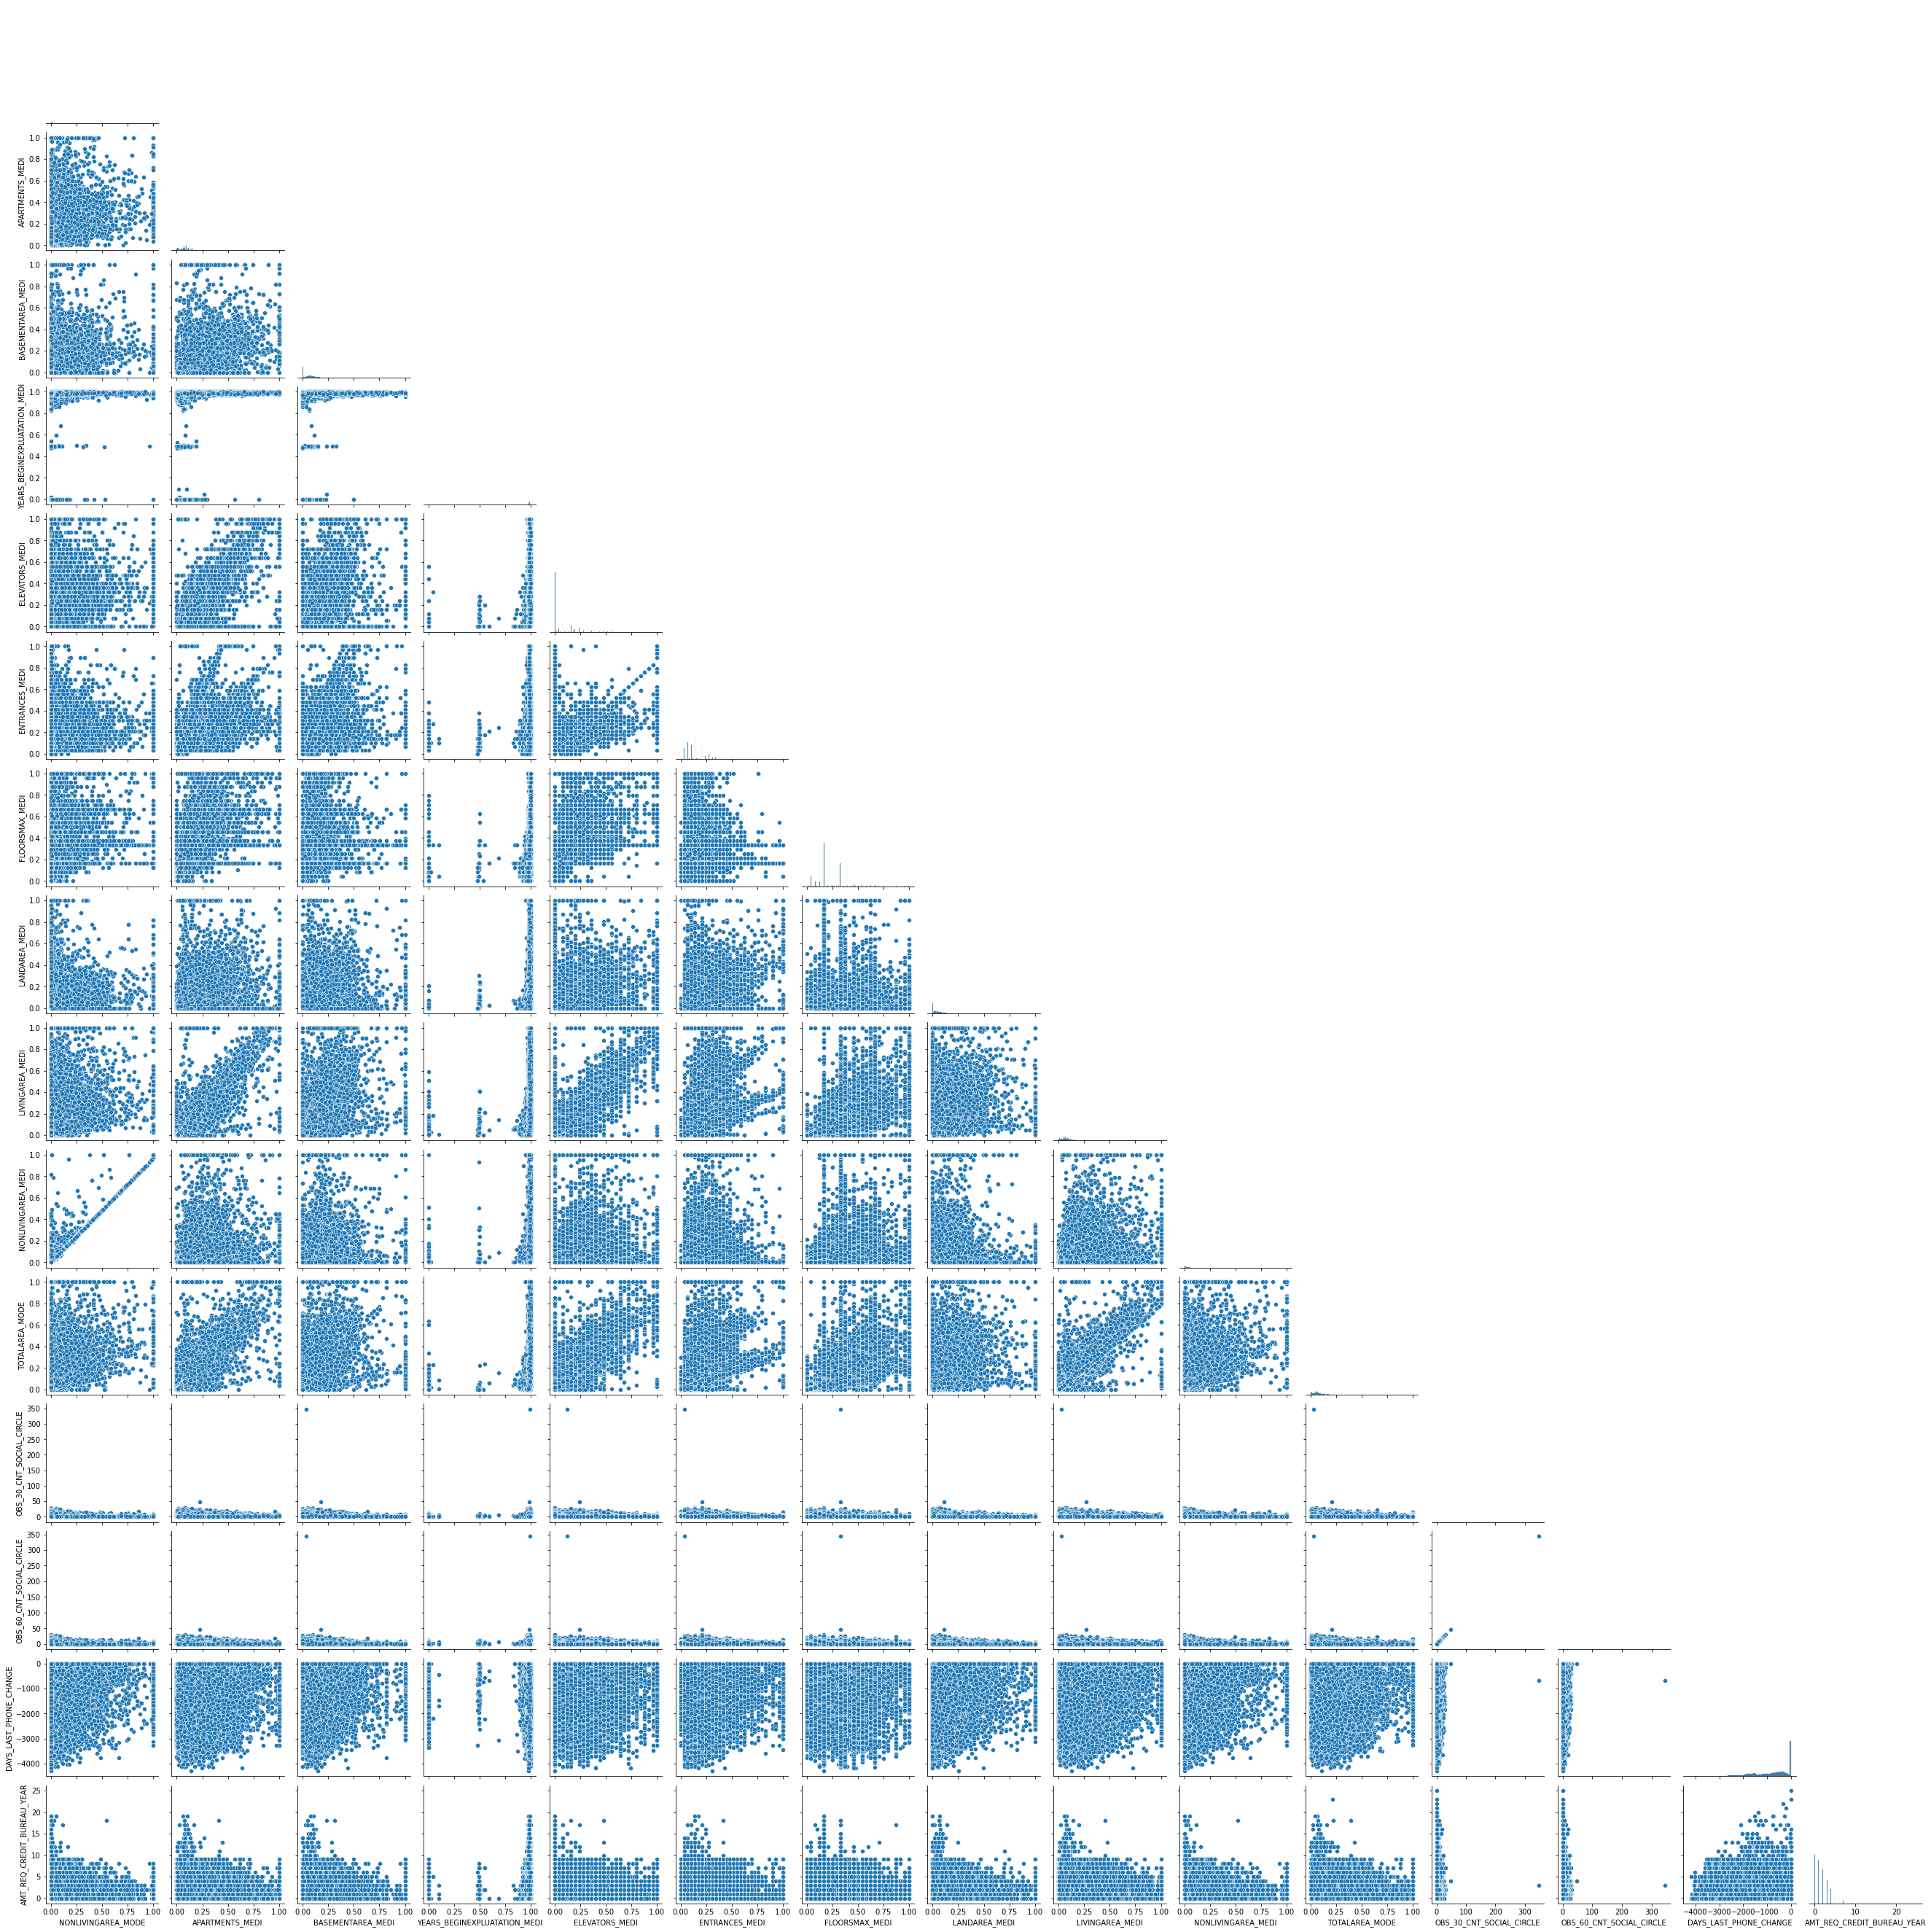

In [144]:
sns.pairplot(df_continuous.iloc[:, 30:45], corner=True)

**3.2.2. Discrete and ordinal features**

In [145]:
df_discrete = reduced_train_data[cols_continuous[~cols_continuous].index]
df_discrete.shape

(307511, 44)

In [146]:
# Computes feature correlation
df_corr = reduced_train_data.corr(method="pearson").abs()

<AxesSubplot:>

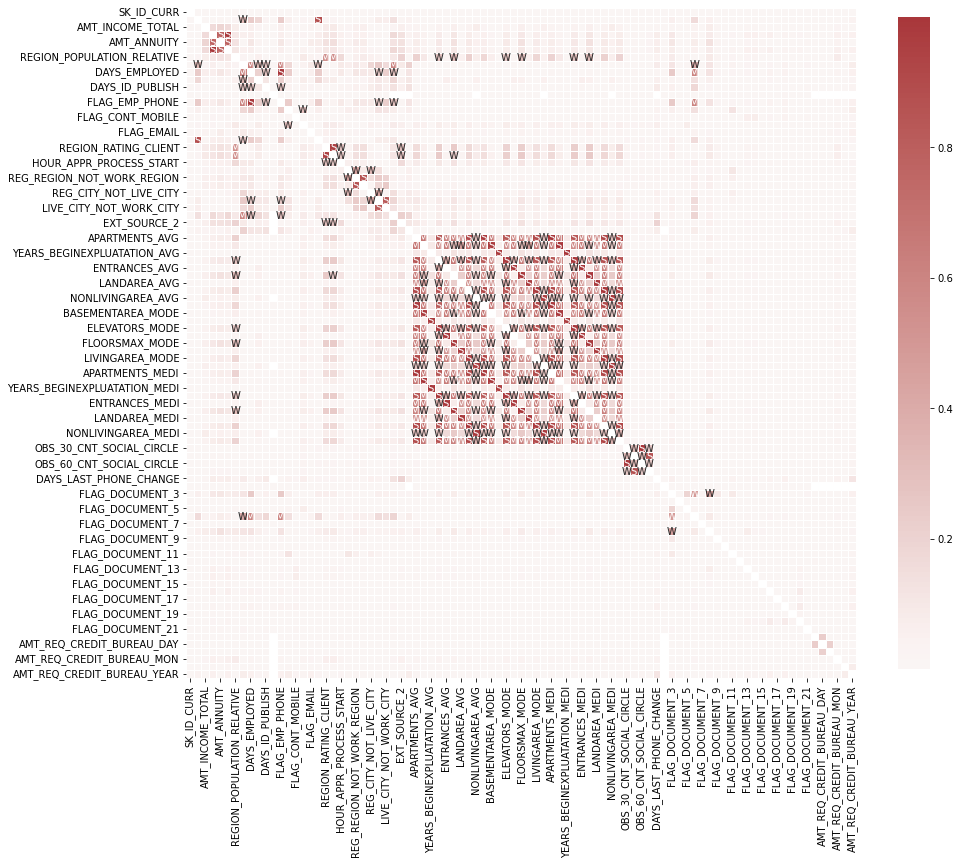

In [147]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [148]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values(ascending= False)

In [149]:
df_corr_stacked = pd.DataFrame(df_corr_stacked)
df_corr_stacked

0
FLAG_EMP_PHONE             DAYS_EMPLOYED                 0.999755
OBS_60_CNT_SOCIAL_CIRCLE   OBS_30_CNT_SOCIAL_CIRCLE      0.998490
FLOORSMAX_MEDI             FLOORSMAX_AVG                 0.997034
ENTRANCES_MEDI             ENTRANCES_AVG                 0.996886
ELEVATORS_MEDI             ELEVATORS_AVG                 0.996099
...                                                           ...
AMT_REQ_CREDIT_BUREAU_QRT  ENTRANCES_MEDI                0.000008
FLAG_DOCUMENT_4            YEARS_BEGINEXPLUATATION_AVG   0.000007
                           YEARS_BEGINEXPLUATATION_MODE  0.000005
FLAG_DOCUMENT_12           FLAG_MOBIL                    0.000005
AMT_REQ_CREDIT_BUREAU_HOUR BASEMENTAREA_MODE             0.000004

[3896 rows x 1 columns]

In [150]:
df_corr_stacked.reset_index(inplace=True)

In [151]:
df_corr_stacked

level_0                       level_1         0
0                 FLAG_EMP_PHONE                 DAYS_EMPLOYED  0.999755
1       OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE  0.998490
2                 FLOORSMAX_MEDI                 FLOORSMAX_AVG  0.997034
3                 ENTRANCES_MEDI                 ENTRANCES_AVG  0.996886
4                 ELEVATORS_MEDI                 ELEVATORS_AVG  0.996099
...                          ...                           ...       ...
3891   AMT_REQ_CREDIT_BUREAU_QRT                ENTRANCES_MEDI  0.000008
3892             FLAG_DOCUMENT_4   YEARS_BEGINEXPLUATATION_AVG  0.000007
3893             FLAG_DOCUMENT_4  YEARS_BEGINEXPLUATATION_MODE  0.000005
3894            FLAG_DOCUMENT_12                    FLAG_MOBIL  0.000005
3895  AMT_REQ_CREDIT_BUREAU_HOUR             BASEMENTAREA_MODE  0.000004

[3896 rows x 3 columns]

In [152]:
df_corr_stacked = df_corr_stacked.rename(columns = {'level_0': 'Col 1', 'level_1': 'Col 2', 0 : 'Corr'})

In [153]:
df_corr_stacked[df_corr_stacked['Corr'] > 0.75]

Col 1                     Col 2      Corr
0             FLAG_EMP_PHONE             DAYS_EMPLOYED  0.999755
1   OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  0.998490
2             FLOORSMAX_MEDI             FLOORSMAX_AVG  0.997034
3             ENTRANCES_MEDI             ENTRANCES_AVG  0.996886
4             ELEVATORS_MEDI             ELEVATORS_AVG  0.996099
..                       ...                       ...       ...
68            TOTALAREA_MODE            ELEVATORS_MODE  0.820813
69            ELEVATORS_MEDI           APARTMENTS_MODE  0.808858
70           APARTMENTS_MODE             ELEVATORS_AVG  0.806009
71           AMT_GOODS_PRICE               AMT_ANNUITY  0.775109
72               AMT_ANNUITY                AMT_CREDIT  0.770138

[73 rows x 3 columns]

In [154]:
cols = list(df_corr_stacked[df_corr_stacked['Corr'] > 0.75]['Col 1'].values)

In [155]:
cols

['FLAG_EMP_PHONE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLOORSMAX_MEDI',
 'ENTRANCES_MEDI',
 'ELEVATORS_MEDI',
 'LIVINGAREA_MEDI',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'LANDAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'FLOORSMAX_MEDI',
 'AMT_GOODS_PRICE',
 'FLOORSMAX_MODE',
 'ELEVATORS_MEDI',
 'LANDAREA_MEDI',
 'ENTRANCES_MEDI',
 'ELEVATORS_MODE',
 'BASEMENTAREA_MEDI',
 'ENTRANCES_MODE',
 'APARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'LIVINGAREA_MEDI',
 'LANDAREA_MODE',
 'BASEMENTAREA_MODE',
 'APARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'NONLIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'REGION_RATING_CLIENT_W_CITY',
 'TOTALAREA_MODE',
 'TOTALAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'TOTALAREA_MODE',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'TOTALAREA_MODE',
 'APARTMENTS_MODE',
 'TOTALAREA_MODE',
 'CNT_FAM_MEMBERS',
 'LIVINGAREA_MEDI',
 'LIVIN

In [156]:
reduced_train_data = reduced_train_data.drop(cols, axis = 1)
reduced_train_data

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002         Cash loans           M            N   
1           100003         Cash loans           F            N   
2           100004    Revolving loans           M            Y   
3           100006         Cash loans           F            N   
4           100007         Cash loans           M            N   
...            ...                ...         ...          ...   
307506      456251         Cash loans           M            N   
307507      456252         Cash loans           F            N   
307508      456253         Cash loans           F            N   
307509      456254         Cash loans           F            N   
307510      456255         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE  ... FLAG_DOCUMENT_18  \
0        Unaccompanied               Working  ...                0   
1               Family         State servant  ...                0   
2        Unaccompanied               Working  ...                0   
3        Unaccompanied               Working  ...                0   
4        Unaccompanied               Working  ...                0   
...                ...                   ...  ...              ...   
307506   Unaccompanied               Working  ...                0   
307507   Unaccompanied             Pensioner  ...                0   
307508   Unaccompanied               Working  ...                0   
307509   Unaccompanied  Commercial associate  ...                0   
307510   Unaccompanied  Commercial associate  ...                0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                     0                0                 0   
1                     0                0                 0   
2                     0                0                 0   
3                     0                0                 0   
4                     0                0                 0   
...                 ...              ...               ...   
307506                0                0                 0   
307507                0                0                 0   
307508                0                0                 0   
307509                0                0                 0   
307510                0                0                 0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              0.0                        0.0   
...                            ...                        ...   
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         1.0                        0.0   
307509                         0.0                        0.0   
307510                         0.0                        0.0   

       

In [157]:
reduced_train_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'NONLIVINGAREA_AVG', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MO